In [24]:
import os, csv, sys

import numpy as np
import scipy.stats as stats
import pandas as pd

import pymongo as pm
from collections import Counter
from functools import reduce
import json
import re
import ast

from PIL import Image, ImageOps, ImageDraw, ImageFont 

from io import BytesIO
import base64

import  matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


In [25]:
WORKER_ID, TRIAL_TYPE, TRIAL_INDEX, CONDITION, STIM_URL, RESPONSES = "workerID", "trial_type", "trial_index", "condition", "stimURL", "responses"
CONFIG_NAME = "config_name"

In [26]:
results_csv_directory = "../results/csv"
# print("Possible CSV results files to load:")
# print(os.listdir(results_csv_directory))


# expects these results, generated by lax-prior-elicitation-4-block-towers-data-generator, in results/csv

results_to_visualize = [
    'prior_elicitation_lax_tower_4_block_unique_silhouettes_categorization.csv',
    'prior_elicitation_lax_tower_4_block_unique_silhouettes_procedural.csv'
]

result_csv_to_dataframe = {}
for result_csv in results_to_visualize:
    result_csv_to_dataframe[result_csv] = pd.read_csv(os.path.join(results_csv_directory, result_csv))
    result_csv_to_dataframe[result_csv][CONFIG_NAME] = result_csv

In [27]:
results_to_visualize

['prior_elicitation_lax_tower_4_block_unique_silhouettes_categorization.csv',
 'prior_elicitation_lax_tower_4_block_unique_silhouettes_procedural.csv']

In [28]:
df_trial = pd.DataFrame()

for result_csv in results_to_visualize:
    df_trial = df_trial.append(result_csv_to_dataframe[result_csv], ignore_index=True)

### Preprocessing

In [30]:
# changes to df_trial (add to data generator in a batch later)

df_trial['label_length'] = df_trial['label'].apply(len)

In [ ]:
lengths = df_trial[['stimId','label','gameID','trial_index','labeling_task']].groupby(['trial_index'])['label']\
                    .apply(lambda labels: np.mean([len(label) for label in labels]))
plt.plot(lengths)

### Basic plots

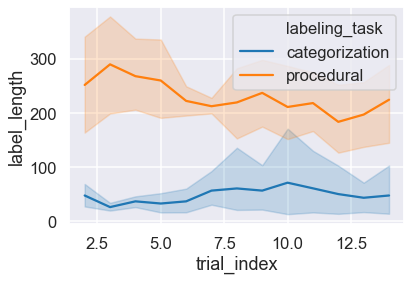

In [32]:
sns.lineplot(data= df_trial, x='trial_index', y='label_length', hue='labeling_task')

### Useful code

In [ ]:
# Load dataframe containing tower information
towers = pd.read_pickle("../stimuli/towers/tower_4_block_unique_silhouettes/tower_4_block_unique_silhouettes.pkl")

# setup block display
block_dims = [(2,1),(1,2)]
block_colors = ['#0A2FB3','#B32F0A']
black = ['#000000','#000000'] # used to display silhouettes
grey = ['#333333','#333333']
world_width = 8
world_height = 8
world_center = int((world_width-1)/2)

In [ ]:
towers_with_labels = df_trial[['stimId','label','gameID']].groupby('stimId')

In [ ]:
# display towers with drawing functions

for towerId, group_df in towers_with_labels:
    utils.draw_tower(utils.worldify(list(towers[towers.tower_number_str == towerId]['stim'])[0],
                                    block_dims = block_dims, 
                                    block_colors = block_colors))
    print(towerId)
    print(list(group_df['label']))